In [1]:
pip install pandas yfinance matplotlib seaborn


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 1.5 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/3.0 MB 1.5 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/3.0 MB 1.3 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/3.0 MB 1.3 MB/s eta 0:00:02
     ----------------- ---------------------- 1.3/3.0 MB 1.2 MB/s eta 0:00:02
     -------------------- ------------------- 1.6/3.0 MB 1.2 MB/s eta 0:00:02
     --------------------------- ------------ 2.1/3.0 MB 1.2 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 1.3 MB/s eta 0:00:01
     ---------------------------------- ----- 2.6/3.0 MB 1.2 MB/s eta 0:00:01
     -------------------------------------- - 2.9/3.0 MB 1.3 MB/s eta 0:00:01
     --

In [3]:
import pandas as pd
import yfinance as yf 
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
stocks = ["TSLA", "AAPL", "AMZN"]

df = yf.download(stocks, start="2024-01-01", end="2025-01-01")["Close"]

df.head()


[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,AMZN,TSLA
Date,,,
2024-01-02,184.532089,149.929993,248.419998
2024-01-03,183.150391,148.470001,238.449997
2024-01-04,180.824371,144.570007,237.929993
2024-01-05,180.098694,145.240005,237.490005
2024-01-08,184.452560,149.100006,240.449997


In [51]:
df.columns

Index(['AAPL', 'AMZN', 'TSLA'], dtype='object', name='Ticker')

In [55]:
df.describe

<bound method NDFrame.describe of Ticker            AAPL        AMZN        TSLA
Date                                          
2024-01-02  184.532089  149.929993  248.419998
2024-01-03  183.150391  148.470001  238.449997
2024-01-04  180.824371  144.570007  237.929993
2024-01-05  180.098694  145.240005  237.490005
2024-01-08  184.452560  149.100006  240.449997
...                ...         ...         ...
2024-12-24  257.916443  229.050003  462.279999
2024-12-26  258.735504  227.050003  454.130005
2024-12-27  255.309296  223.750000  431.660004
2024-12-30  251.923019  221.300003  417.410004
2024-12-31  250.144974  219.389999  403.839996

[252 rows x 3 columns]>

In [57]:
df.isnull().sum()

Ticker
AAPL    0
AMZN    0
TSLA    0
dtype: int64

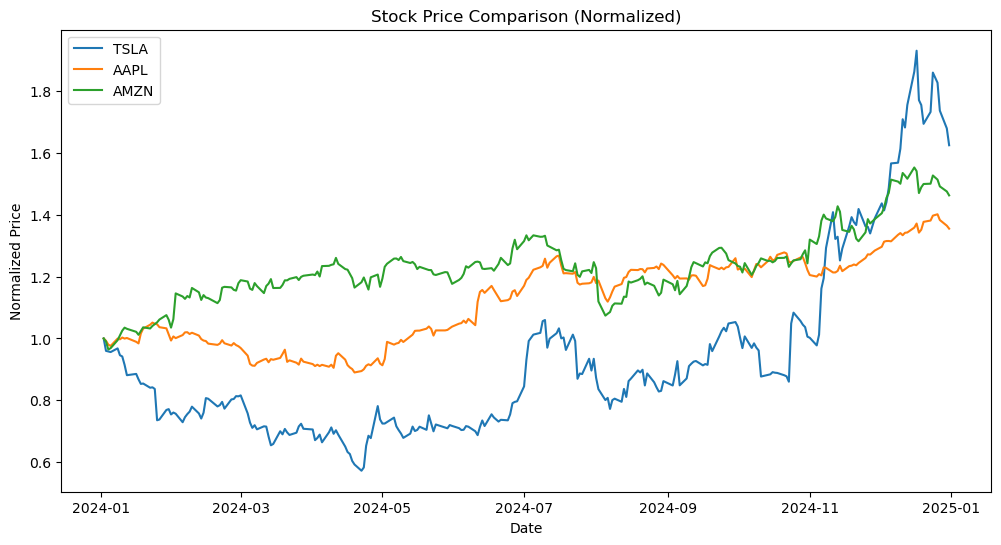

In [59]:
df_normalized = df / df.iloc[0]  

plt.figure(figsize=(12,6))
for stock in stocks:
    plt.plot(df_normalized[stock], label=stock)

plt.title("Stock Price Comparison (Normalized)")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

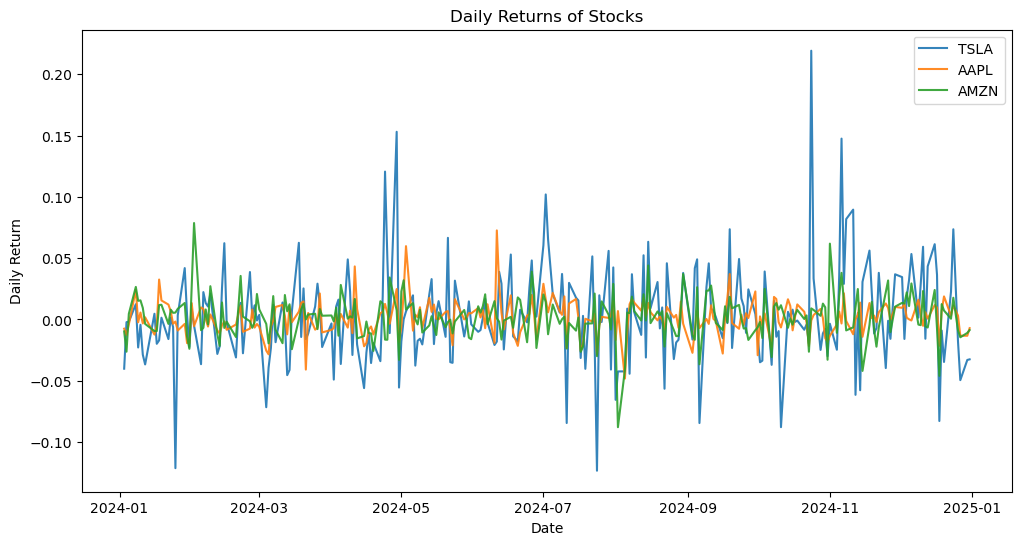

In [63]:
df_returns = df.pct_change()  

plt.figure(figsize=(12,6))
for stock in stocks:
    plt.plot(df_returns[stock], label=stock, alpha=0.9)

plt.title("Daily Returns of Stocks")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()


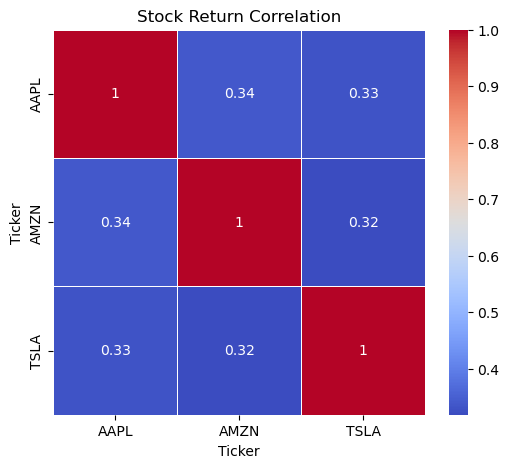

In [65]:
corr_matrix = df_returns.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Stock Return Correlation")
plt.show()


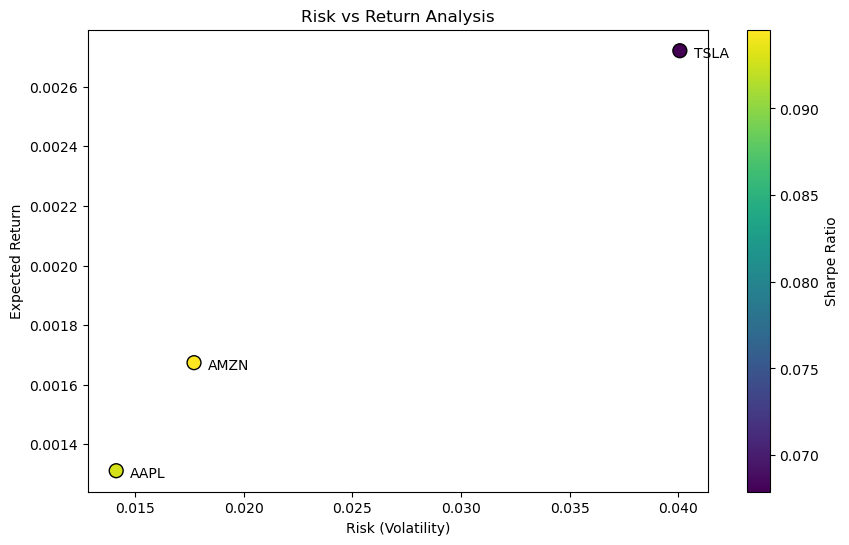

In [67]:
mean_returns = df_returns.mean()
volatility = df_returns.std()

plt.figure(figsize=(10, 6))
plt.scatter(volatility, mean_returns, c=mean_returns/volatility, cmap='viridis', edgecolors='k', s=100)
plt.colorbar(label="Sharpe Ratio")
for stock in stocks:
    plt.annotate(stock, (volatility[stock], mean_returns[stock]), xytext=(10,-5), textcoords="offset points")

plt.xlabel("Risk (Volatility)")
plt.ylabel("Expected Return")
plt.title("Risk vs Return Analysis")
plt.show()
